# Diminution de la réduction de dimension - PCA

## Préparation du dataset

In [1]:
import pandas as pd
import numpy as np
import plotly.express as pex
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt

# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
df = pd.read_csv('drinking_water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df_clean = df.dropna()

In [7]:
#Mélanger les données 
from sklearn.utils import shuffle
df_clean = shuffle(df_clean)

## Etude de la PCA

### Préparation de la PCA

In [8]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Le dataset est répartie entre des données d'entrainement et de test et l'on applique ensuite la PCA après avoir scalé les données.

La PCA va être testée sur 2 modèles : 
- SVM
- Random Forest

In [9]:
scaler = StandardScaler()

y = df_clean.Potability
X = df_clean.drop(['Potability'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
scaler = StandardScaler()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

model_svm = SVC(C=10, gamma=0.01)
model_rfc = RandomForestClassifier()


### Etude la variance cumulée des composantes

[ 13.7   26.46  38.37  49.73  60.71  71.41  81.82  91.46 100.  ]


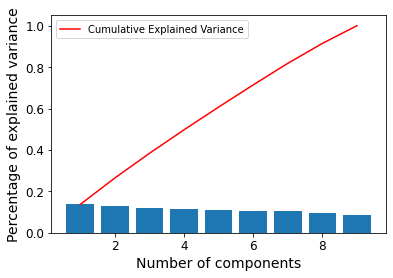

In [10]:
#Afficher les premières composantes de la PCA 

pd.DataFrame(pca.components_.T).loc[:4,:5]

#Afficher la variance cumulée des composantes de la PCA : choisir environ à 90%
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

# Explained variance plot
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Percentage of explained variance')
plt.xlabel('Number of components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_ ),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

On étudie la variance cumulée des composantes après la PCA : elle est presque répartie de manière équivalente entre toutes les composantes même si elle décroit pour proportionnellement au nombre de composants

### Cross-validation 

On effectue une 5-cross-validation pour évaluer le score moyen sur chacun des modèles pour de 1 à 9 composantes traitées avec la PCA. 

Les scores utilisées seront le F1_score, la précision, le rappel et l'accuracy.

In [16]:
Columns = ['N_components', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1', 'test_accuracy', 'train_accuracy']
results_pca_svm = pd.DataFrame(columns=Columns)
results_pca_rfc = pd.DataFrame(columns=Columns)

kf_5 = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)

# Calculate score using CV for the 9 principal components, adding one component at the time.
for i in np.arange(1, 10):
    dict_scores = model_selection.cross_validate(model_svm, X_train_pca[:,:i], y_train.ravel(), cv=kf_5, scoring=['precision', 'recall', 'f1', 'accuracy'],return_train_score=True)
    list_scores = list(dict_scores.values())
    stats_results = [valeur.mean() for valeur in list_scores[2:]]
    stats_results.insert(0,i)
    results_pca_svm.loc[i] = stats_results

for i in np.arange(1, 10):
    dict_scores = model_selection.cross_validate(model_rfc, X_train_pca[:,:i], y_train.ravel(), cv=kf_5, scoring=['precision', 'recall', 'f1', 'accuracy'],return_train_score=True)
    list_scores = list(dict_scores.values())
    stats_results = [valeur.mean() for valeur in list_scores[2:]]
    stats_results.insert(0,i)
    results_pca_rfc.loc[i] = stats_results

C:\Users\theoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

#### Analyse des résultats de la SVM

In [23]:
results_pca_svm

,N_components,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.596313,0.596305
2,2.0,0.000000,0.200000,0.000000,0.000871,0.000000,0.001735,0.596313,0.596660
3,3.0,0.666667,0.720027,0.014083,0.015815,0.027559,0.030933,0.599864,0.600213
4,4.0,0.736566,0.778680,0.069489,0.076105,0.126791,0.138259,0.614795,0.617982
5,5.0,0.840993,0.859617,0.203605,0.221285,0.326931,0.351563,0.663141,0.670933
6,6.0,0.831118,0.858921,0.194414,0.226477,0.314813,0.358092,0.658873,0.672709
7,7.0,0.809282,0.859263,0.197951,0.227365,0.317139,0.359110,0.657449,0.673066
8,8.0,0.789420,0.865286,0.218715,0.238339,0.341039,0.373230,0.661717,0.677685
9,9.0,0.767907,0.867664,0.201253,0.247593,0.318082,0.384553,0.653186,0.681062


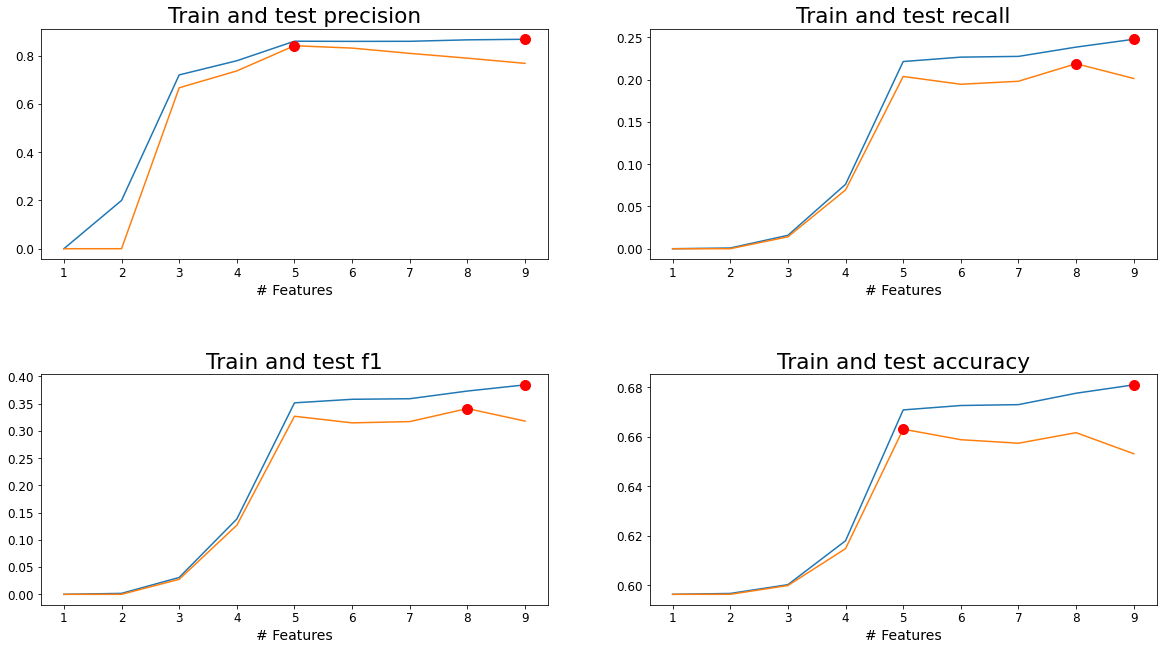

In [24]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.5)

# Set up a 2x2 grid so we can look at 4 plots at once

# We will now plot a red dot to indicate the model with the highest scores.

def graph_results(score, dataframe):

    train = dataframe[f"train_{score}"]
    test = dataframe[f"test_{score}"]

    plt.plot(train, label='train')
    plt.plot(train.argmax()+1, train.max(), "or")
    plt.xlabel(f'# Features')

    plt.plot(test, label='test')
    plt.plot(test.argmax()+1, test.max(), "or")
    plt.xlabel(f'# Features')

    plt.title(f'Train and test {score}')

plt.subplot(2, 2, 1)
graph_results('precision', results_pca_svm)
plt.subplot(2, 2, 2)
graph_results('recall', results_pca_svm)
plt.subplot(2, 2, 3)
graph_results('f1', results_pca_svm)
plt.subplot(2, 2, 4)
graph_results('accuracy', results_pca_svm)

Le graphe bleu correspond au score sur les données Train, l'orange sur les données Test. 
Le point rouge permet de montrer pour combien de composantes le score est maximal.

On remarque que la PCA permet d'obtenir des résultats quasi-optimaux à partir de 5 composantes pour l'ensemble des scores.

#### Analyse des résultats du Random Forest

In [22]:
results_pca_rfc

,N_components,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,1.0,0.412753,0.999554,0.414678,0.998676,0.413185,0.999114,0.526663,0.999290
2,2.0,0.428790,1.000000,0.346118,0.999561,0.380396,0.999780,0.548666,0.999822
3,3.0,0.453578,1.000000,0.319293,1.000000,0.374207,1.000000,0.570026,1.000000
4,4.0,0.473267,1.000000,0.332886,1.000000,0.389381,1.000000,0.581376,1.000000
5,5.0,0.633595,1.000000,0.434398,1.000000,0.514349,1.000000,0.670950,1.000000
6,6.0,0.646571,1.000000,0.427759,1.000000,0.513252,1.000000,0.674519,1.000000
7,7.0,0.624606,1.000000,0.401153,1.000000,0.486303,1.000000,0.660286,1.000000
8,8.0,0.639526,1.000000,0.385668,1.000000,0.478726,1.000000,0.663865,1.000000
9,9.0,0.641467,1.000000,0.380706,1.000000,0.476483,1.000000,0.664579,1.000000


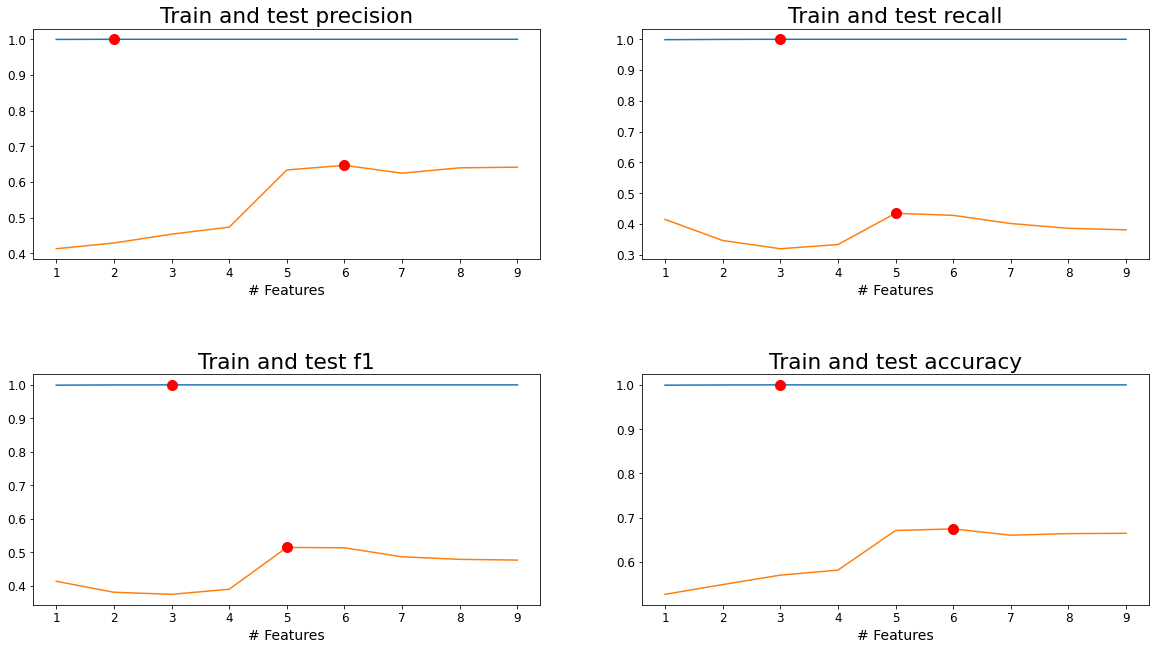

In [25]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.5)

plt.subplot(2, 2, 1)
graph_results('precision', results_pca_rfc)
plt.subplot(2, 2, 2)
graph_results('recall', results_pca_rfc)
plt.subplot(2, 2, 3)
graph_results('f1', results_pca_rfc)
plt.subplot(2, 2, 4)
graph_results('accuracy', results_pca_rfc)

On observe les mêmes résultats pour le Random Forest, et la PCA permet de réduire la dimension à 5 composantes